In [1]:
# %tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
import IPython.display as display
import os

In [4]:
import pathlib
from pathlib import Path
data_dir = Path('train_foods/.')

# chicken_wings, french_fries, grilled_cheese_sandwich, hamburger, hot_dog, ice_cream, macaroni_and_cheese, ramen, steak, waffles

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

9900

In [6]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['chicken_wings', 'french_fries', 'grilled_cheese_sandwich',
       'hamburger', 'hot_dog', 'ice_cream', 'macaroni_and_cheese',
       'ramen', 'steak', 'waffles'], dtype='<U23')

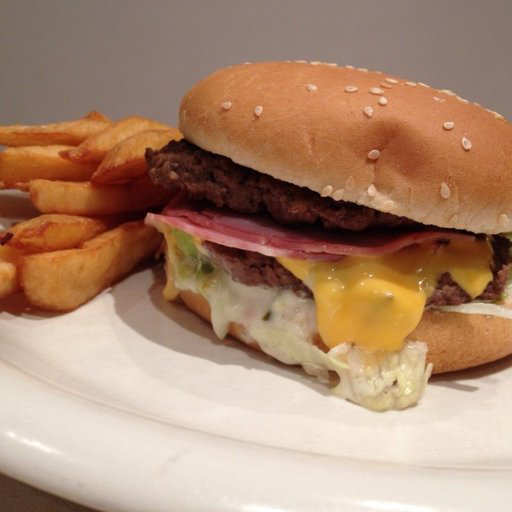

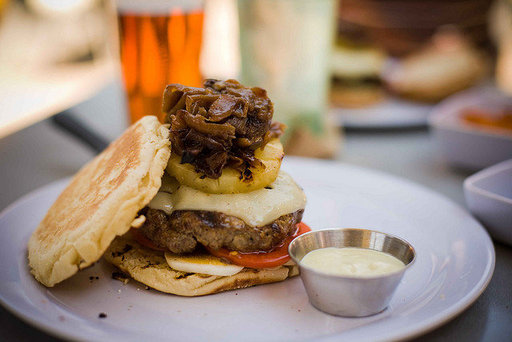

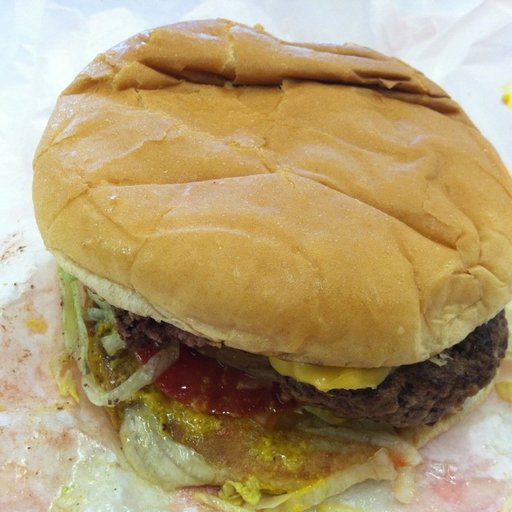

In [7]:
hamburgers = list(data_dir.glob('hamburger/*'))

for image_path in hamburgers[:3]:
    display.display(Image.open(str(image_path)))

In [8]:
# Loading using tf
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [9]:
for f in list_ds.take(5):
  print(f.numpy())

b'train_foods/french_fries/french_fries453.jpg'
b'train_foods/macaroni_and_cheese/macaroni_and_cheese624.jpg'
b'train_foods/waffles/waffles652.jpg'
b'train_foods/macaroni_and_cheese/macaroni_and_cheese558.jpg'
b'train_foods/waffles/waffles458.jpg'


In [10]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

In [11]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [224, 224])

In [12]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [13]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [14]:
type(labeled_ds)

tensorflow.python.data.ops.dataset_ops.ParallelMapDataset

In [15]:
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  [False  True False False False False False False False False]


In [16]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(990) # BATCH_SIZE

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [17]:
train_ds = prepare_for_training(labeled_ds)

image_batch, label_batch = next(iter(train_ds))

In [18]:
type(image_batch.numpy())
type(image_batch)
# type(label_batch.numpy())

tensorflow.python.framework.ops.EagerTensor

In [19]:
image_batch[0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7668268 , 0.58251303, 0.367507  ],
        [0.7618248 , 0.577511  , 0.36574632],
        [0.74485797, 0.5580233 , 0.34709886],
        ...,
        [0.2949188 , 0.12631083, 0.11454611],
        [0.3353339 , 0.14195658, 0.11376517],
        [0.3207489 , 0.13251358, 0.08545476]],

       [[0.7607844 , 0.58029217, 0.34687877],
        [0.7686275 , 0.58795524, 0.35742298],
        [0.7492397 , 0.55708283, 0.337475  ],
        ...,
        [0.29165745, 0.1424173 , 0.12543027],
        [0.30500245, 0.1316131 , 0.09603877],
        [0.3447368 , 0.16694596, 0.11596558]],

       [[0.7711485 , 0.5812325 , 0.3372549 ],
        [0.75988406, 0.56996804, 0.3259904 ],
        [0.75510216, 0.56078434, 0.32941177],
        ...,
        [0.22148958, 0.09964041, 0.0825534 ],
        [0.27945188, 0.1250501 , 0.09317726],
        [0.29463807, 0.14055656, 0.08935574]],

       ...,

       [[0.69105595, 0.46976766, 0.2706079 ],
        [0.70

In [20]:
image_batch.numpy()[0]

array([[[0.7668268 , 0.58251303, 0.367507  ],
        [0.7618248 , 0.577511  , 0.36574632],
        [0.74485797, 0.5580233 , 0.34709886],
        ...,
        [0.2949188 , 0.12631083, 0.11454611],
        [0.3353339 , 0.14195658, 0.11376517],
        [0.3207489 , 0.13251358, 0.08545476]],

       [[0.7607844 , 0.58029217, 0.34687877],
        [0.7686275 , 0.58795524, 0.35742298],
        [0.7492397 , 0.55708283, 0.337475  ],
        ...,
        [0.29165745, 0.1424173 , 0.12543027],
        [0.30500245, 0.1316131 , 0.09603877],
        [0.3447368 , 0.16694596, 0.11596558]],

       [[0.7711485 , 0.5812325 , 0.3372549 ],
        [0.75988406, 0.56996804, 0.3259904 ],
        [0.75510216, 0.56078434, 0.32941177],
        ...,
        [0.22148958, 0.09964041, 0.0825534 ],
        [0.27945188, 0.1250501 , 0.09317726],
        [0.29463807, 0.14055656, 0.08935574]],

       ...,

       [[0.69105595, 0.46976766, 0.2706079 ],
        [0.70398134, 0.48045194, 0.2726088 ],
        [0.70532197, 0

In [21]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

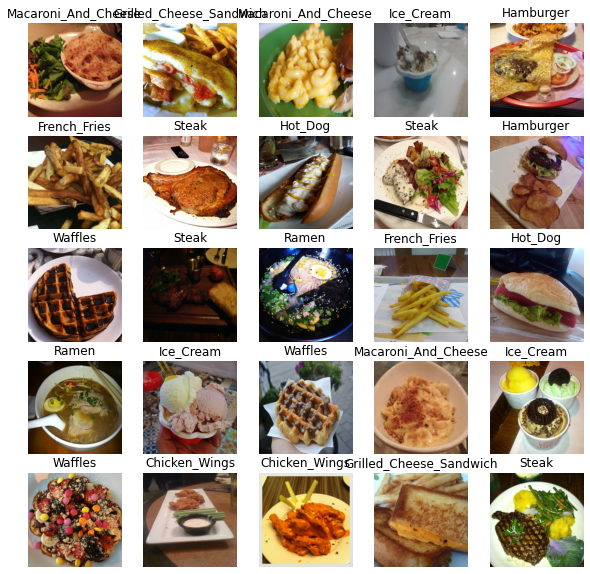

In [22]:
show_batch(image_batch.numpy(), label_batch.numpy())

In [23]:
import time
default_timeit_steps = 1000

def timeit(ds, steps=default_timeit_steps):
  start = time.time()
  it = iter(ds)
  for i in range(steps):
    batch = next(it)
    if i%10 == 0:
      print('.',end='')
  print()
  end = time.time()

  duration = end-start
  print("{} batches: {} s".format(steps, duration))
  print("{:0.5f} Images/s".format(990*steps/duration)) # BATCH_SIZE

In [24]:
# `tf.data`
# timeit(train_ds)

In [25]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [26]:
CLASS_NAMES

array(['chicken_wings', 'french_fries', 'grilled_cheese_sandwich',
       'hamburger', 'hot_dog', 'ice_cream', 'macaroni_and_cheese',
       'ramen', 'steak', 'waffles'], dtype='<U23')

In [27]:
image_batch.numpy().shape

(990, 224, 224, 3)

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(224, 224, 3)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(image_batch.numpy(), label_batch.numpy(), epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
31/31 [==============================] - 21s 685ms/step - loss: 48.3917 - accuracy: 0.1101
Epoch 2/10
31/31 [==============================] - 6s 181ms/step - loss: 5.5950 - accuracy: 0.1677
Epoch 3/10
31/31 [==============================] - 5s 168ms/step - loss: 5.0985 - accuracy: 0.2222
Epoch 4/10
31/31 [==============================] - 5s 170ms/step - loss: 4.2039 - accuracy: 0.2414
Epoch 5/10
31/31 [==============================] - 5s 171ms/step - loss: 4.5170 - accuracy: 0.2616
Epoch 6/10
31/31 [==============================] - 5s 170ms/step - loss: 4.8142 - accuracy: 0.2636
Epoch 7/10
31/31 [==============================] - 5s 169ms/step - loss: 1.8931 - accuracy: 0.4586
Epoch 8/10
31/31 [==============================] - 5s 164ms/step - loss: 1.9463 - accuracy: 0.4465
Epoch 9/10
31/31 [==============================] - 5s 169ms/step - loss: 1.6225 - accuracy: 0.5020
Epoch 10/10
31/31 [==============================] - 5s 160ms/step - loss: 2.1125 - accuracy: 0.45

In [40]:
np.transpose(np.nonzero(label_batch[5].numpy()))[0][0]

1

Pick a number: 85


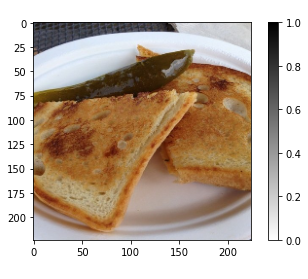

In [47]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['chicken_wings', 'french_fries', 'grilled_cheese_sandwich',
       'hamburger', 'hot_dog', 'ice_cream', 'macaroni_and_cheese',
       'ramen', 'steak', 'waffles']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = image_batch.numpy()[num]
label = np.transpose(np.nonzero(label_batch[num].numpy()))[0][0]
predict(model, image, label)
